## How well do jobs and skills pay for Engineers in America?

**Methodology**

1. Evaluate median salary for Engineering jobs
2. Find median salary per skill for Engineers
3. Visualize for highest paying skills and most demanded skills

### Import Libraries and Data

In [11]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Salary Distribution by Job Title

In [12]:
american_countries = [
    'United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Colombia',
    'Chile', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay',
    'Uruguay', 'Guyana', 'Suriname', 'Panama', 'Costa Rica', 'Guatemala',
    'Honduras', 'Nicaragua', 'El Salvador', 'Belize', 'Cuba', 'Haiti',
    'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Bahamas'
]

df_america = df[(df['job_country'].isin(american_countries))].dropna(subset=['salary_year_avg'])

In [13]:
job_titles = df['job_title_short'].unique().tolist()
job_titles = [title for title in job_titles if 'Engineer' in title]

# Filter the df for engineering titles
df_america_engineers = df_america[df_america['job_title_short'].isin(job_titles)]

# Order the job titles by median salary
job_order = df_america_engineers.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Senior Data Engineer',
 'Data Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer',
 'Software Engineer']

### Plot Salary Distributions

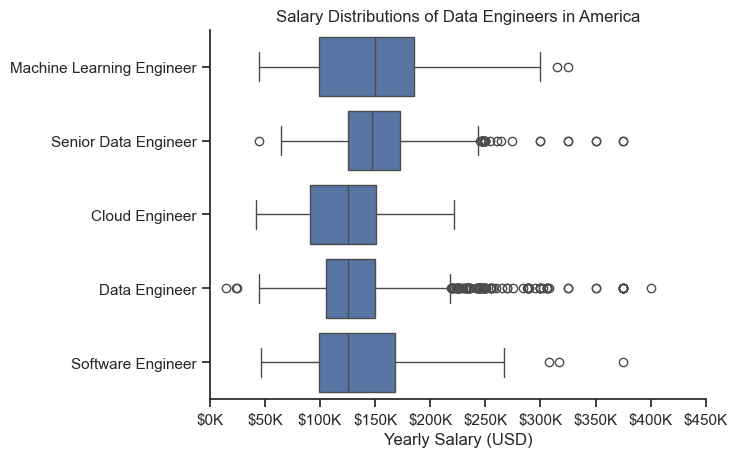

In [ ]:
sns.boxplot(data=df_america_engineers, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Engineers in America')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 450000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigate Median Salary Vs Skill for Engineers

In [15]:
# Only get data analysis jobs in the US
df_DE_america = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(american_countries))].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DE_america = df_DE_america.dropna(subset=['salary_year_avg'])

df_DE_america = df_DE_america.explode('job_skills')

df_DE_america[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
146,129500.0,golang
146,129500.0,scala
146,129500.0,python


### Determine The Highest Paid Skills and Most Demanded Skills

In [16]:
df_DE_top_pay = df_DE_america.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DE_top_pay = df_DE_top_pay.head(10)

df_DE_top_pay

,count,median
job_skills,,
arch,1,249000.0
haskell,1,213000.0
ggplot2,2,176250.0
mongo,188,173500.0
macos,3,172000.0
cassandra,330,170672.0
atlassian,26,165000.0
redis,51,162500.0
zoom,17,161875.0


In [17]:
df_DE_skills = df_DE_america.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DE_skills = df_DE_skills.head(10).sort_values(by='median', ascending=False)

df_DE_skills

,count,median
job_skills,,
kafka,977,150000.0
scala,897,150000.0
java,1286,145000.0
spark,1643,143000.0
snowflake,1236,142500.0
hadoop,905,142500.0
aws,2236,140000.0
python,3278,135600.0
azure,1581,131100.0


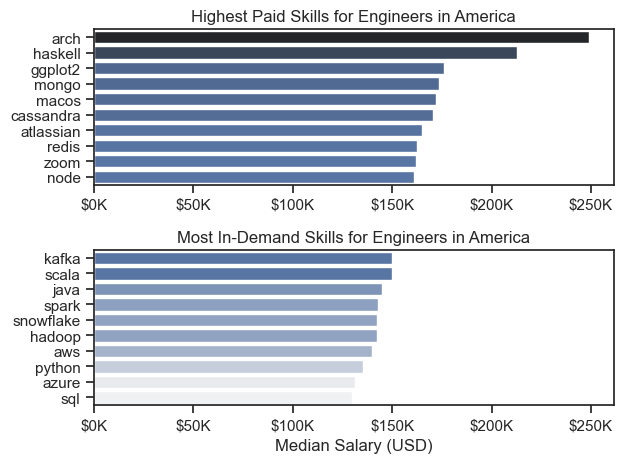

In [ ]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

sns.barplot(data=df_DE_top_pay, x='median', y=df_DE_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Engineers in America')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DE_skills, x='median', y=df_DE_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Engineers in America')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()